In [1]:
# import libraries
from dataProcess import *
from copy import deepcopy
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import statistics
from scipy.stats import skew
from scipy.stats import kurtosis

# print all data
dataSource = "2019-07-07/pulley_TAMP2_2019-07-07_20-43-19_8.txt"
data = get_force_lines_by_title(dataSource)
  
for topic in data:
    for k in range(0, len(data[topic])):
        for i,j in data[topic][k].items():
            print(i,j)
        print("\n")

jointQ [1.378275752067566, -1.6464327017413538, 1.653083324432373, -1.5788534323321741, -1.5768817106830042, -0.1886528174029749]
wrench [0.0, 0.0, -0.04998779296875, -0.001999974250793457, -0.0015000104904174805, 0.0]
gripSep 0.015
gripPose [0.021678992320862855, -0.46801144062136824, 0.14682877835767533, 0.002849312303367275, 3.1415583200677792, -0.0022597041877899645]


jointQ [1.378347635269165, -1.646445099507467, 1.6549763679504395, -1.5807808081256312, -1.5769060293780726, -0.18862897554506475]
wrench [0.0, 0.0, 0.125030517578125, -0.001000046730041504, 0.0007499456405639648, 0.0005000084638595581]
gripSep 0.015
gripPose [0.02164301619485217, -0.46801159460532654, 0.1457894314425618, 0.0029687972056619007, 3.141581217047216, -0.0022900974763672057]


jointQ [1.3783117532730103, -1.6464327017413538, 1.657538890838623, -1.5834983030902308, -1.5768697897540491, -0.1886051336871546]
wrench [0.0, 0.0, 0.01251220703125, -0.0015000104904174805, -0.0006250143051147461, 0.000249996781349

In [73]:
# print wrench data
frcSeries = timeseries_from_file('2019-07-07/pulley_TAMP2_2019-07-07_20-43-19_8.txt','limited_z_push_record::tamp','wrench')
for i in range(0, len(frcSeries)):
    print(frcSeries[i],"\n")

Obtained a time series with 71 elements
[0.0, 0.0, -0.04998779296875, -0.001999974250793457, -0.0015000104904174805, 0.0] 

[0.0, 0.0, 0.125030517578125, -0.001000046730041504, 0.0007499456405639648, 0.0005000084638595581] 

[0.0, 0.0, 0.01251220703125, -0.0015000104904174805, -0.0006250143051147461, 0.00024999678134918213] 

[0.0, 0.0, -0.043731689453125, -0.0017499923706054688, 0.00018739700317382812, 0.000125005841255188] 

[0.0, 0.0, -0.121856689453125, -0.0008749961853027344, 0.001093745231628418, 6.251037120819092e-05] 

[0.0, 0.0, -0.01092529296875, 0.0015624761581420898, 0.001046895980834961, 3.1247735023498535e-05] 

[0.0, 0.0, 0.044525146484375, -0.001718759536743164, -0.0009765625, 0.0005156248807907104] 

[0.0, 0.0, 0.022247314453125, -0.000859379768371582, 0.0005117654800415039, -0.00024218857288360596] 

[0.0, 0.0, 0.011138916015625, -0.0004296302795410156, 0.0007559061050415039, 0.0003789067268371582] 

[0.0, 0.0, 0.211151123046875, -0.0004296302795410156, -0.00124406814

In [61]:
# separate the wrench data into the respective forces/torques
def grab_force_data(frcSeries):
    global Fx,Fy,Fz,Tx,Ty,Tz,FTdat
    Fx = [elem[0] for elem in frcSeries]
    Fy = [elem[1] for elem in frcSeries]
    Fz = [elem[2] for elem in frcSeries]
    Tx = [elem[3] for elem in frcSeries]
    Ty = [elem[4] for elem in frcSeries]
    Tz = [elem[5] for elem in frcSeries]
    FTdat = [Fx,Fy,Fz,Tx,Ty,Tz]
grab_force_data(frcSeries)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


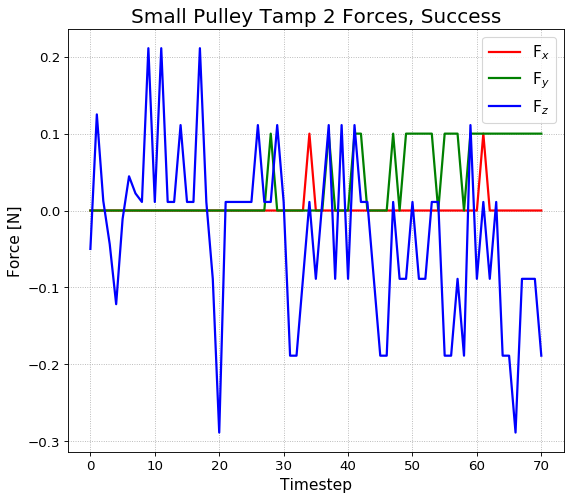

In [71]:
# graph the wrench data
figNum = 0
action = "Small Pulley Tamp 2"
FT = 'F'
ftL = 'Force'
UN = "N"
SF = 'Success'
msg = ""
DT = FTdat[:3]
ticStep = 10

_lw = 2
_titleFntSz = 18
_axesFntSz = 14
_labelFntSz = 12
_legendFntSz = 14

plt.figure(figNum,figsize = (8,7),dpi = 80,facecolor = 'w',edgecolor = 'k')

# graph respective forces
plt.plot(DT[0],'r',linewidth = _lw)
plt.plot(DT[1],'g',linewidth = _lw)
plt.plot(DT[2],'b',linewidth = _lw)

# graph legend
plt.legend([FT+"$_x$",FT+"$_y$",FT+"$_z$"],fontsize = _legendFntSz)

# xy axis settings
plt.xlabel("Timestep",fontsize = _axesFntSz)
plt.xticks(np.arange(0,len(Fx),step = ticStep))
plt.ylabel(ftL + " [" + UN + "]",fontsize = _axesFntSz)
plt.grid(linestyle = 'dotted')
plt.title(action + " " + ftL + "s, " + SF,fontsize = _titleFntSz)
ax = plt.gca()
ax.tick_params(labelsize = _labelFntSz)

# save figure as .eps
plt.savefig(action.replace(" ","_") + SF + ftL + ".eps")

In [92]:
# calculate states
DataFx = []
DataFy = []
DataFz = []
for i in range(0, len(frcSeries)):
    DataFx.append(frcSeries[i][0])
    DataFy.append(frcSeries[i][1])
    DataFz.append(frcSeries[i][2])
    
# calculate mean
print("---Mean---")
print("F_x = ",statistics.mean(DataFx))
print("F_y = ",statistics.mean(DataFy))
print("F_z = ",statistics.mean(DataFy))
print("\n")

# calculate skew
print("---Skew---")
print("F_x = ",skew(DataFx))
print("F_y = ",skew(DataFy))
print("F_z = ",skew(DataFz))
print("\n")

# calculate kurtosis
print("---Kurtosis---")
print("F_x = ",kurtosis(DataFx))
print("F_y = ",kurtosis(DataFy))
print("F_z = ",kurtosis(DataFz))
print("\n")

# calculate variance
print("---Variance---")
print("F_x = ",statistics.variance(DataFx))
print("F_y = ",statistics.variance(DataFy))
print("F_z = ",statistics.variance(DataFz))
print("\n")


---Mean---
F_x =  0.0028169020800523355
F_y =  0.03521127600065419
F_z =  0.03521127600065419


---Skew---
F_x =  5.703418756083607
F_y =  0.6192562158505682
F_z =  -0.08454891908213942


---Kurtosis---
F_x =  30.528985507246325
F_y =  -1.6165217391304347
F_z =  -0.073923855449185


---Variance---
F_x =  0.0002776661283773354
F_y =  0.002313884403144462
F_z =  0.012019813395811757


